In [243]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor   
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import  KNeighborsRegressor

df = pd.read_csv("ActualCons.csv")
df

,Start_date,End_date,gridload_,Gridload_hydrops,Hydropumpedstorage_,Residualload_,Biomass_,Hydropower_,Wind_offshore_,Wind_onshore_,Photovoltaics_,Other_renewable_,Nuclear_,Lignite_,Hard_coal_,Fossil_gas_,Hydro_pumped_storage_,Other_conventional_
0,1-Sep-20,2-Sep-20,1342557,1371834,29277,1125267,103359,56158,17024,69639,130627,4120,189973,314710,182621,212795,28317,33765
1,2-Sep-20,3-Sep-20,1348501,1381791,33290,1119710,103971,57349,15242,41255,172294,4261,190328,323727,175644,209403,31080,32163
2,3-Sep-20,4-Sep-20,1360908,1388889,27981,881923,103984,55627,84862,237365,156758,4204,189588,303394,115384,194980,25989,32048
3,4-Sep-20,5-Sep-20,1331548,1366801,35253,870831,104016,55351,77673,227138,155906,3949,188241,278066,91944,184787,35907,31857
4,5-Sep-20,6-Sep-20,1129571,1156867,27296,724030,104806,48692,108132,174547,122862,4156,188525,254518,72064,98578,21980,33273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,28-Aug-25,29-Aug-25,1318831,1337304,18473,1052927,88582,46385,16853,101742,147309,2339,0,203442,89484,196021,22793,34293
1823,29-Aug-25,30-Aug-25,1256669,1278916,22247,791023,88640,54223,42189,152891,270566,2358,0,181950,59249,131684,22464,34693
1824,30-Aug-25,31-Aug-25,1063287,1097436,34149,552458,89498,53401,43959,190173,276697,2332,0,143636,16365,75247,25896,33397
1825,31-Aug-25,1-Sep-25,1006050,1052391,46341,433563,88896,46023,72171,187092,313224,2272,0,123355,17639,67340,17167,33283


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Start_date             1827 non-null   object
 1   End_date               1827 non-null   object
 2   gridload_              1827 non-null   int64 
 3   Gridload_hydrops       1827 non-null   int64 
 4   Hydropumpedstorage_    1827 non-null   int64 
 5   Residualload_          1827 non-null   int64 
 6   Biomass_               1827 non-null   int64 
 7   Hydropower_            1827 non-null   int64 
 8   Wind_offshore_         1827 non-null   int64 
 9   Wind_onshore_          1827 non-null   int64 
 10  Photovoltaics_         1827 non-null   int64 
 11  Other_renewable_       1827 non-null   int64 
 12  Nuclear_               1827 non-null   int64 
 13  Lignite_               1827 non-null   int64 
 14  Hard_coal_             1827 non-null   int64 
 15  Fossil_gas_          

In [245]:
df.head()

,Start_date,End_date,gridload_,Gridload_hydrops,Hydropumpedstorage_,Residualload_,Biomass_,Hydropower_,Wind_offshore_,Wind_onshore_,Photovoltaics_,Other_renewable_,Nuclear_,Lignite_,Hard_coal_,Fossil_gas_,Hydro_pumped_storage_,Other_conventional_
0,1-Sep-20,2-Sep-20,1342557,1371834,29277,1125267,103359,56158,17024,69639,130627,4120,189973,314710,182621,212795,28317,33765
1,2-Sep-20,3-Sep-20,1348501,1381791,33290,1119710,103971,57349,15242,41255,172294,4261,190328,323727,175644,209403,31080,32163
2,3-Sep-20,4-Sep-20,1360908,1388889,27981,881923,103984,55627,84862,237365,156758,4204,189588,303394,115384,194980,25989,32048
3,4-Sep-20,5-Sep-20,1331548,1366801,35253,870831,104016,55351,77673,227138,155906,3949,188241,278066,91944,184787,35907,31857
4,5-Sep-20,6-Sep-20,1129571,1156867,27296,724030,104806,48692,108132,174547,122862,4156,188525,254518,72064,98578,21980,33273


In [246]:
print(df.columns)

Index(['Start_date', 'End_date', 'gridload_', 'Gridload_hydrops',
       'Hydropumpedstorage_', 'Residualload_', 'Biomass_', 'Hydropower_',
       'Wind_offshore_', 'Wind_onshore_', 'Photovoltaics_', 'Other_renewable_',
       'Nuclear_', 'Lignite_', 'Hard_coal_', 'Fossil_gas_',
       'Hydro_pumped_storage_', 'Other_conventional_'],
      dtype='object')


In [247]:
X = df.drop(["Start_date","End_date","Gridload_hydrops","Residualload_","gridload_"],axis=1)
y=df["gridload_"]

In [248]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [249]:
RandomForest = RandomForestRegressor()

In [250]:
RandomForest.fit(X_train,y_train)

RandomForestRegressor()

In [251]:
scoreRF=RandomForest.score(X_test,y_test)

In [252]:
y_pred = RandomForest.predict(X_test)

In [253]:
mean_squared_error(y_test,y_pred)

4443742910.701723

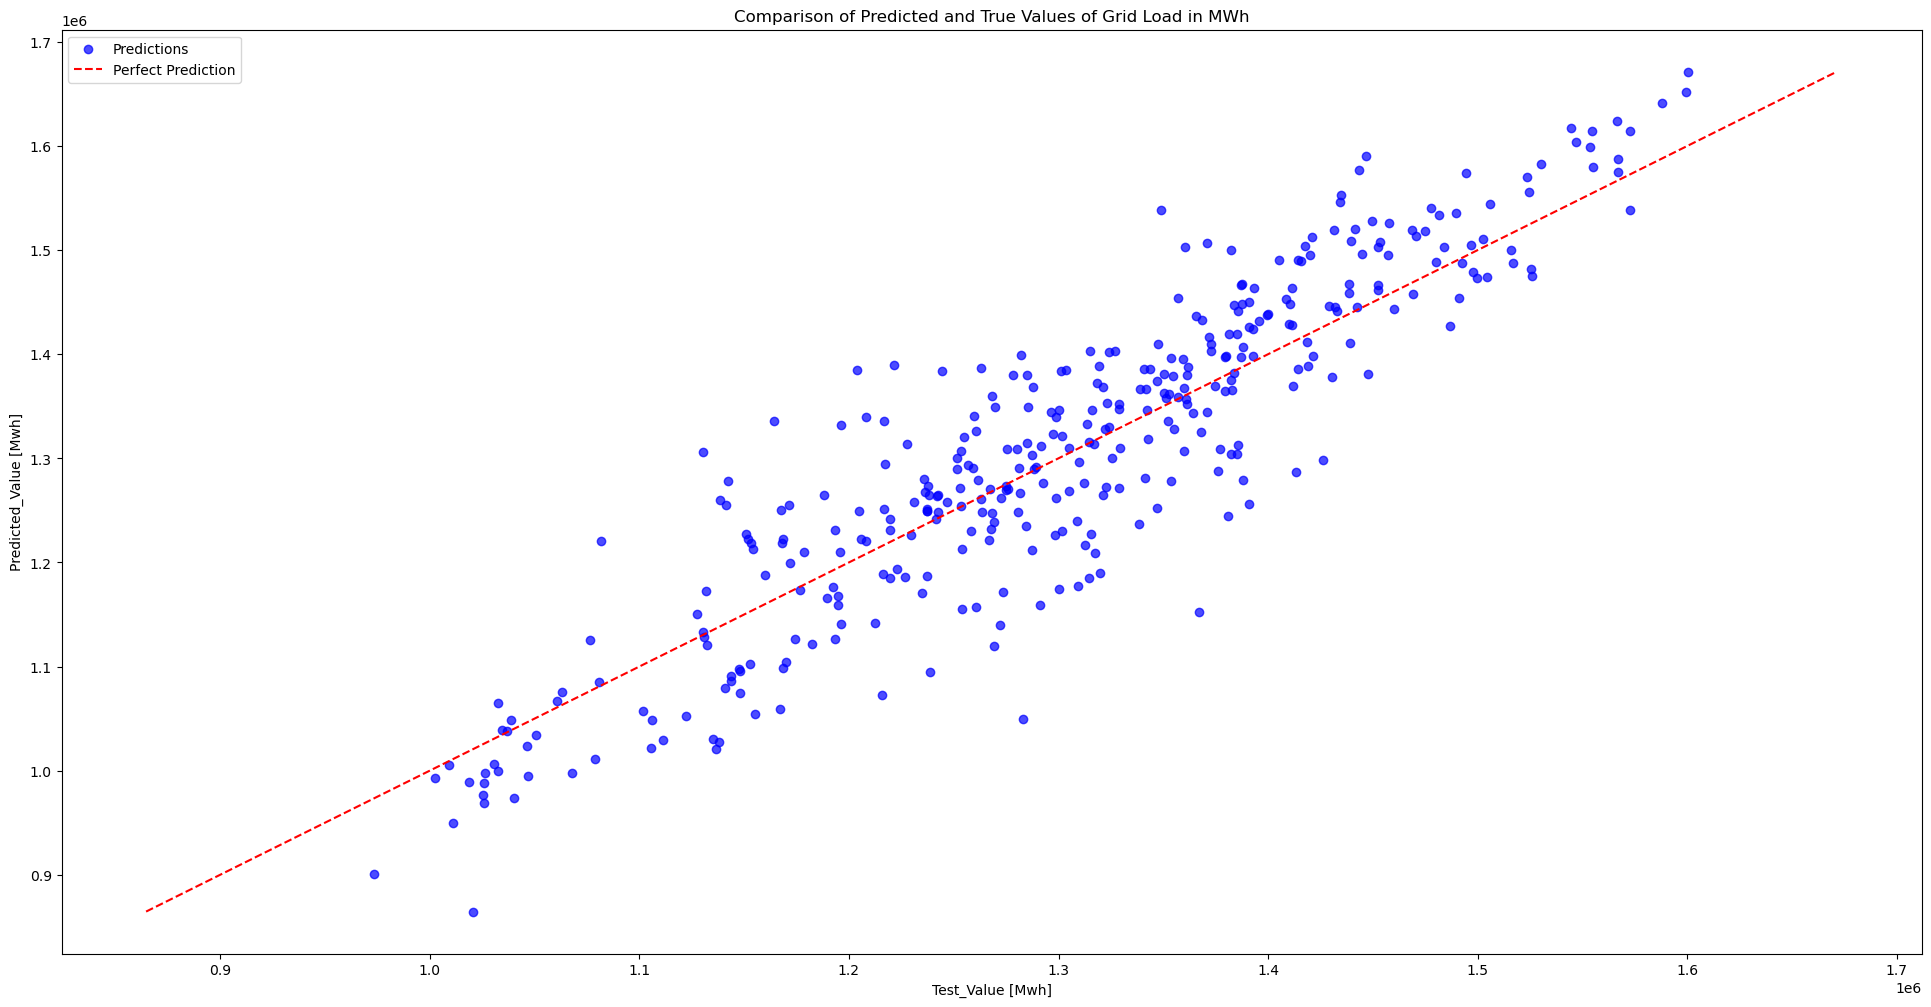

In [254]:
plt.figure(figsize=(24,12))
plt.scatter(y_pred, y_test,alpha=0.7, color='blue', label='Predictions' )
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title("Comparison of Predicted and True Values of Grid Load in MWh")
plt.xlabel("Test_Value [Mwh]")
plt.ylabel("Predicted_Value [Mwh]")
plt.legend()
plt.show()

In [255]:
LinearReg = LinearRegression()

In [256]:
LinearReg.fit(X_train,y_train)

LinearRegression()

In [257]:
scoreLR=LinearReg.score(X_test,y_test)

In [258]:
y_predl = LinearReg.predict(X_test)

In [259]:
mean_squared_error(y_test,y_predl)

3307554361.726028

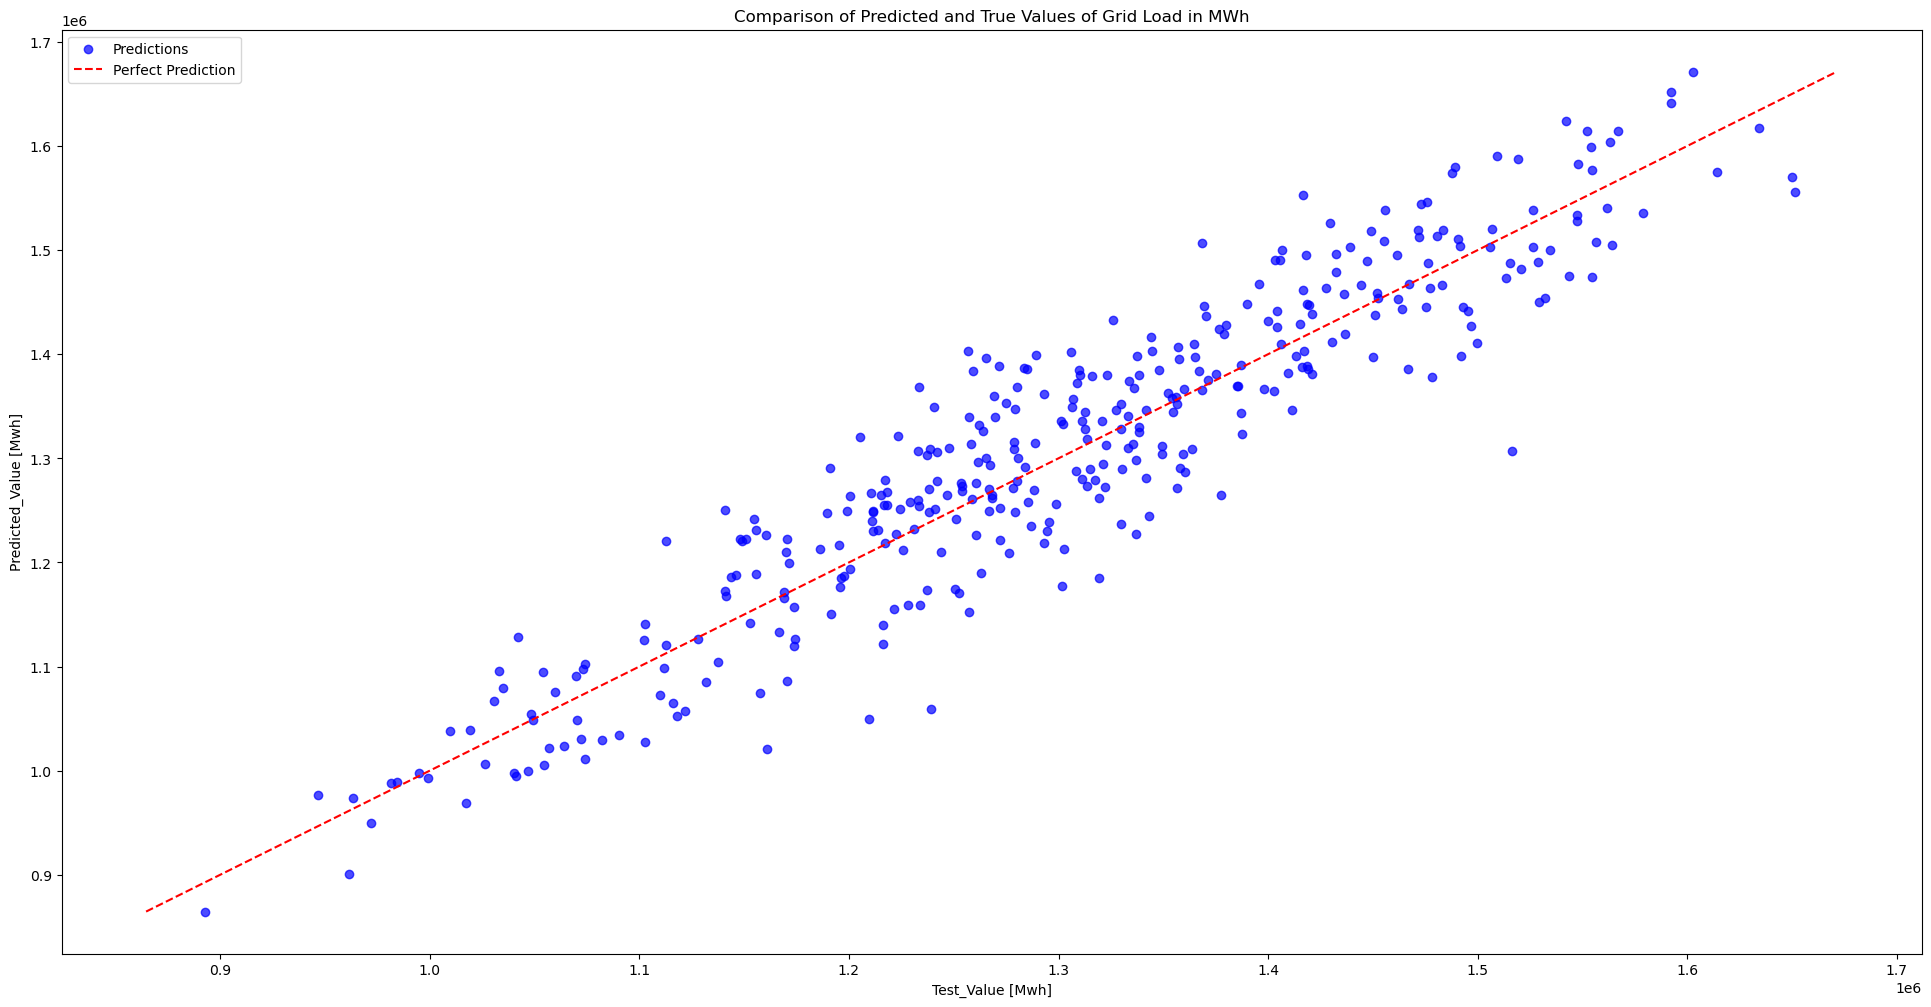

In [260]:
plt.figure(figsize=(24,12))
plt.scatter(y_predl, y_test,alpha=0.7, color='blue', label='Predictions' )
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title("Comparison of Predicted and True Values of Grid Load in MWh")
plt.xlabel("Test_Value [Mwh]")
plt.ylabel("Predicted_Value [Mwh]")
plt.legend()
plt.show()

In [261]:
scaler = StandardScaler()

In [262]:
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [263]:
KNReg = KNeighborsRegressor(n_neighbors=3)

In [264]:
KNReg.fit(x_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=3)

In [265]:
KNReg.predict(x_test_scaled)

array([1401814.33333333, 1172771.        , 1501356.        ,
       1280969.        , 1197776.33333333, 1239652.66666667,
       1498459.33333333, 1323269.66666667, 1080201.        ,
       1265273.        , 1147601.        , 1506393.        ,
       1250716.33333333, 1309553.        , 1211774.33333333,
       1263298.        , 1353368.66666667, 1230339.        ,
       1125100.        , 1538900.33333333, 1567964.33333333,
       1292335.66666667, 1484838.66666667, 1625163.33333333,
       1309216.66666667, 1349039.        , 1398409.        ,
       1258296.33333333, 1270074.66666667, 1258562.33333333,
       1197776.33333333, 1433425.66666667, 1553351.        ,
       1412682.        , 1284507.        , 1477228.66666667,
       1060506.        , 1382382.66666667, 1370489.66666667,
       1448287.66666667, 1330122.66666667,  992834.        ,
       1236676.66666667, 1391312.        , 1428574.33333333,
       1544436.66666667, 1012904.66666667, 1388099.        ,
       1485878.66666667,

In [266]:
scoreKnn=KNReg.score(x_test_scaled,y_test)

In [267]:
y_predk = KNReg.predict(x_test_scaled)

In [268]:
mean_squared_error(y_test,y_predk)

5598794306.675167

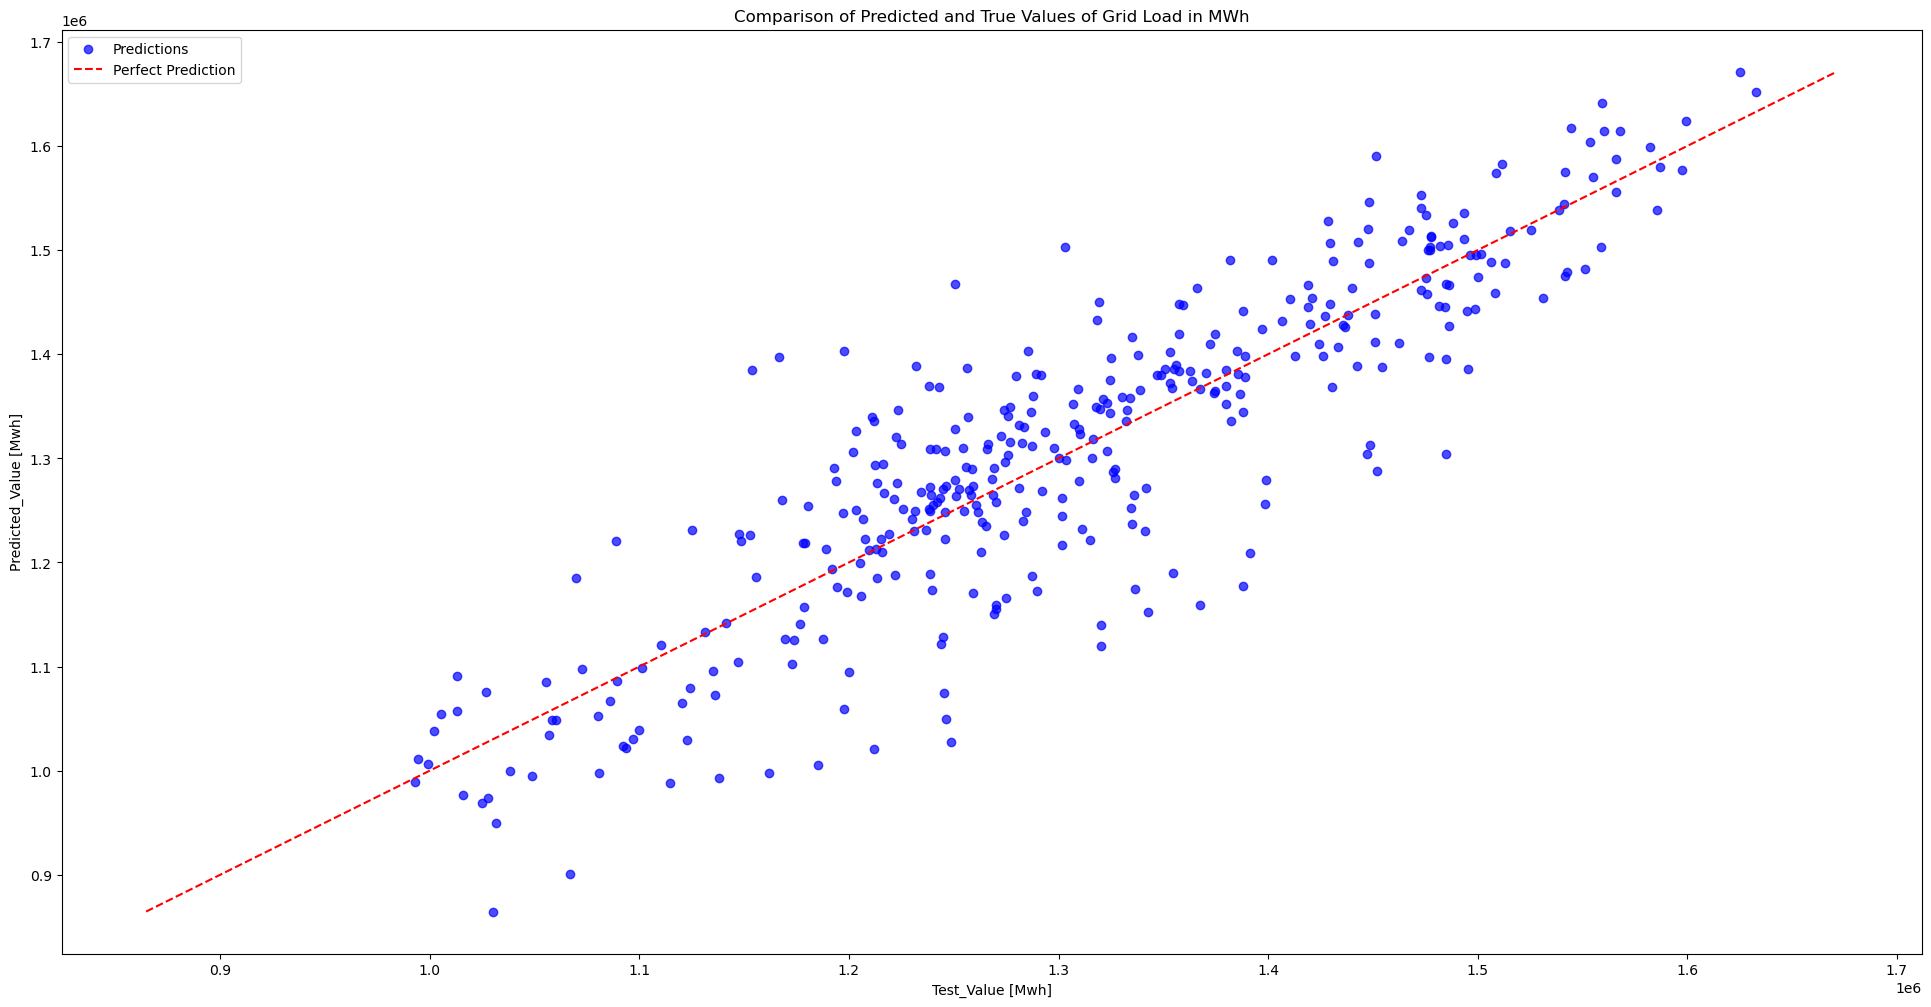

In [269]:
plt.figure(figsize=(24,12))
plt.scatter(y_predk, y_test,alpha=0.7, color='blue', label='Predictions' )
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title("Comparison of Predicted and True Values of Grid Load in MWh")
plt.xlabel("Test_Value [Mwh]")
plt.ylabel("Predicted_Value [Mwh]")
plt.legend()
plt.show()

In [270]:
labels =["RandomForest","LinearRegression","KNeighbors"]
values = [scoreRF*100,scoreLR*100,scoreKnn*100]

In [271]:
values = [round(values,2) for values in values]

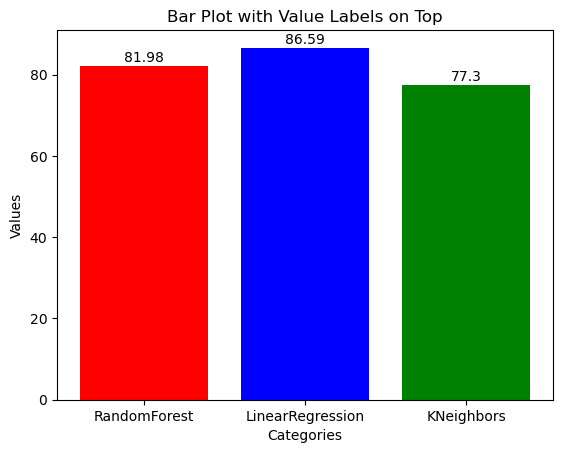

In [272]:
bars = plt.bar(labels, values, color=['red', 'blue', 'green'])
plt.title('Bar Plot with Value Labels on Top')
plt.xlabel('Categories')
plt.ylabel('Values')

for bar in bars:
    yval = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.3, str(yval), ha='center', va='bottom')

plt.show()